# Stock market Risk Analysis for Tesla Stock Prices

The Visualisations in this project have been made using the Plotly package which may not be visible In github repository, To see those plots or the complete program with visualisation You can click on the link in README.md file.

#### Importing Essential Libraries and packages

In [404]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

In [405]:
from plotly.offline import init_notebook_mode, plot, iplot, download_plotlyjs
init_notebook_mode(connected = True)

#### Importing Stock market data from the Internet

In [406]:
import pandas_datareader.data as web

In [407]:
from datetime import datetime

In [520]:
# Setting the Start and End date for Stock Market Analysis
# Data of past 1 year

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [409]:
# Importing Tesla Motors Stock Prices

TSLA = web.DataReader('TSLA','yahoo',start,end)

In [410]:
TSLA.to_csv('TSLA.csv')

In [411]:
TSLA_data = pd.read_csv('TSLA.csv')

In [412]:
TSLA_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-07-23,260.480011,254.500000,256.709991,260.170013,5023100,260.170013
1,2019-07-24,266.070007,258.160004,259.170013,264.880005,11072800,264.880005
2,2019-07-25,234.500000,225.550003,233.500000,228.820007,22418300,228.820007
3,2019-07-26,230.259995,222.250000,226.919998,228.039993,10027700,228.039993
4,2019-07-29,235.940002,226.029999,227.089996,235.770004,9273300,235.770004


In [440]:
TSLA_data['Date'] = pd.to_datetime(TSLA_data['Date'])

In [441]:
# Checking if there are any null values or not

TSLA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       254 non-null    datetime64[ns]
 1   High       254 non-null    float64       
 2   Low        254 non-null    float64       
 3   Open       254 non-null    float64       
 4   Close      254 non-null    float64       
 5   Volume     254 non-null    int64         
 6   Adj Close  254 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


In [442]:
TSLA_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,587.105276,554.432520,570.865985,571.535197,1.356141e+07,571.535197
std,351.515528,324.236697,339.584695,337.925438,8.343364e+06,337.925438
min,215.020004,211.000000,213.600006,211.399994,2.465600e+06,211.399994
25%,263.294991,257.230011,259.552513,260.620010,7.449575e+06,260.620010
50%,506.244995,473.285004,487.645004,481.449997,1.184850e+07,481.449997
75%,811.472473,763.467499,790.304977,788.865021,1.721792e+07,788.865021
max,1794.989990,1562.000000,1678.949951,1643.000000,6.093880e+07,1643.000000


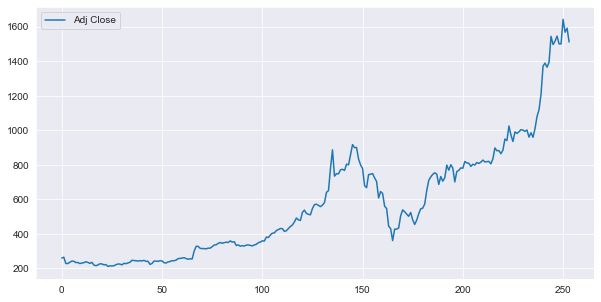

In [443]:
# Plotting Adjusted Closing price for Tesla Motors Stock

TSLA_data['Adj Close'].plot(legend=True,figsize=(10,5))
plt.show()

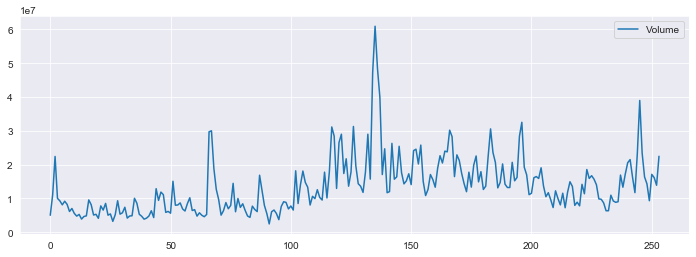

In [444]:
# Plotting Volume for Tesla Motors Stock

TSLA_data['Volume'].plot(legend=True,figsize=(12,4))
plt.show()

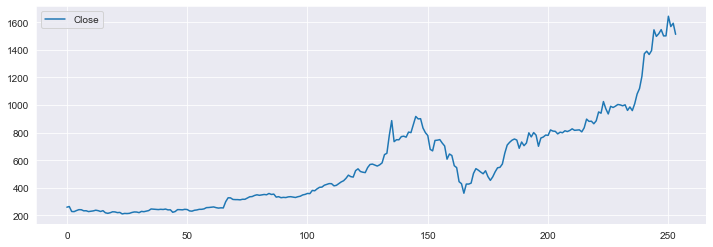

In [445]:
# Plotting Closing price for Tesla Motors Stock

TSLA_data['Close'].plot(legend=True,figsize=(12,4))
plt.show()

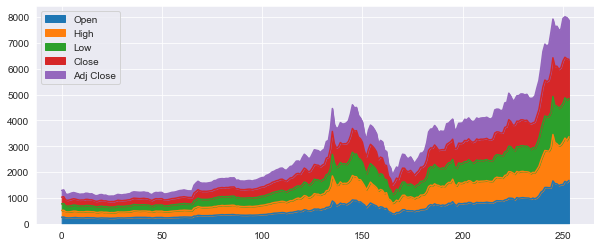

In [446]:
TSLA_data[['Open','High','Low','Close','Adj Close']].plot(kind = 'area',figsize = (10,4))
plt.show()

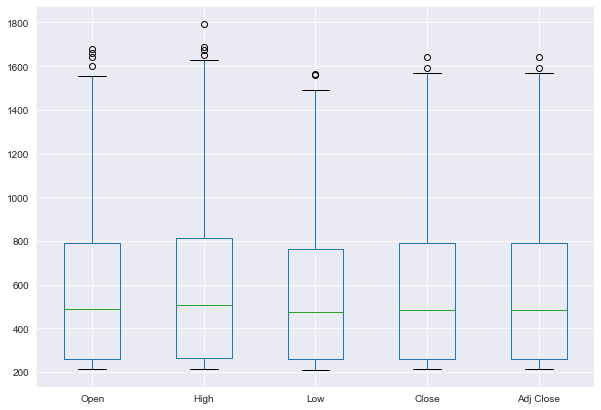

In [447]:
TSLA[['Open','High','Low','Close','Adj Close']].plot(kind = 'box',figsize = (10,7))
plt.show()

In [498]:
# setting layout
layout = go.Layout(title = "Tesla's Stock Prices", xaxis = dict(title = 'Date'), yaxis = dict(title = 'Price'))

 ### Tesla's Stock Prices Over Last One Year

In [499]:
tesla = [{'x' : TSLA_data['Date'], 'y' : TSLA_data['Adj Close']}]
fig0 = go.Figure(data = tesla, layout = layout)
iplot(fig0)

In [500]:
TSLA_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-07-23,260.480011,254.500000,256.709991,260.170013,5023100,260.170013
1,2019-07-24,266.070007,258.160004,259.170013,264.880005,11072800,264.880005
2,2019-07-25,234.500000,225.550003,233.500000,228.820007,22418300,228.820007
3,2019-07-26,230.259995,222.250000,226.919998,228.039993,10027700,228.039993
4,2019-07-29,235.940002,226.029999,227.089996,235.770004,9273300,235.770004


### Applying Machine Learning Model for Predictions

#### Identifying Dependent and Independent Variable

In [501]:
X = TSLA_data.drop(['Date','Close','Adj Close'],axis = 1)
Y = TSLA_data['Adj Close']

In [502]:
X

,High,Low,Open,Volume
0,260.480011,254.500000,256.709991,5023100
1,266.070007,258.160004,259.170013,11072800
2,234.500000,225.550003,233.500000,22418300
3,230.259995,222.250000,226.919998,10027700
4,235.940002,226.029999,227.089996,9273300
...,...,...,...,...
249,1537.510010,1490.000000,1513.449951,9330000
250,1650.000000,1488.000000,1519.010010,17121400
251,1675.000000,1558.000000,1639.930054,16157300
252,1626.420044,1562.000000,1599.000000,13902500


In [503]:
Y

0       260.170013
1       264.880005
2       228.820007
3       228.039993
4       235.770004
          ...     
249    1500.839966
250    1643.000000
251    1568.359985
252    1592.329956
253    1511.999878
Name: Adj Close, Length: 254, dtype: float64

#### Splitting Data Into test and Train Set

In [504]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### Performing feature Scaling

In [505]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Using Linear Regression

In [506]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [507]:
Y_pred = regressor.predict(X_test)

#### Evaluation for model

In [508]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs

In [509]:
score = f'''
{'Metric'.ljust(18)}{'Train'.center(22)}{'Test'.center(22)}
{'R_Square_Score'.ljust(18)}{rs(y_train,regressor.predict(X_train))}\t{rs(y_test,regressor.predict(X_test))}
{'MSE'.ljust(18)}{mse(y_train,regressor.predict(X_train))}\t{mse(y_test,regressor.predict(X_test))}
'''
print(score)


Metric                    Train                  Test         
R_Square_Score    0.9985825075621663	0.9983872589648659
MSE               172.19271546441394	133.30731889761336



#### Visualization and Comparison of True And Predicted STock Prices.

In [518]:
import plotly.graph_objects as go
trace1 = go.Scatter(x = X_train.T[0], y = y_train, mode = 'markers', name = 'TRUE')
trace2 = go.Scatter(x = X_train.T[0], y = regressor.predict(X_train).T, mode = 'markers', name = 'PREDICTED')

df = [trace1,trace2]
layout.xaxis.title.text = ' '
fig = go.Figure(data = df, layout = layout)

In [519]:
iplot(fig)